<a href="https://colab.research.google.com/github/MDA1422/BIDM_Tasks/blob/main/BIDM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display, HTML
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


Mounted at /content/drive



# **Task 1 Exploratory Data Analysis**

**1.1 Data Analysis**

This shows the top 15 sellers with the most orders compared to all the sellers.

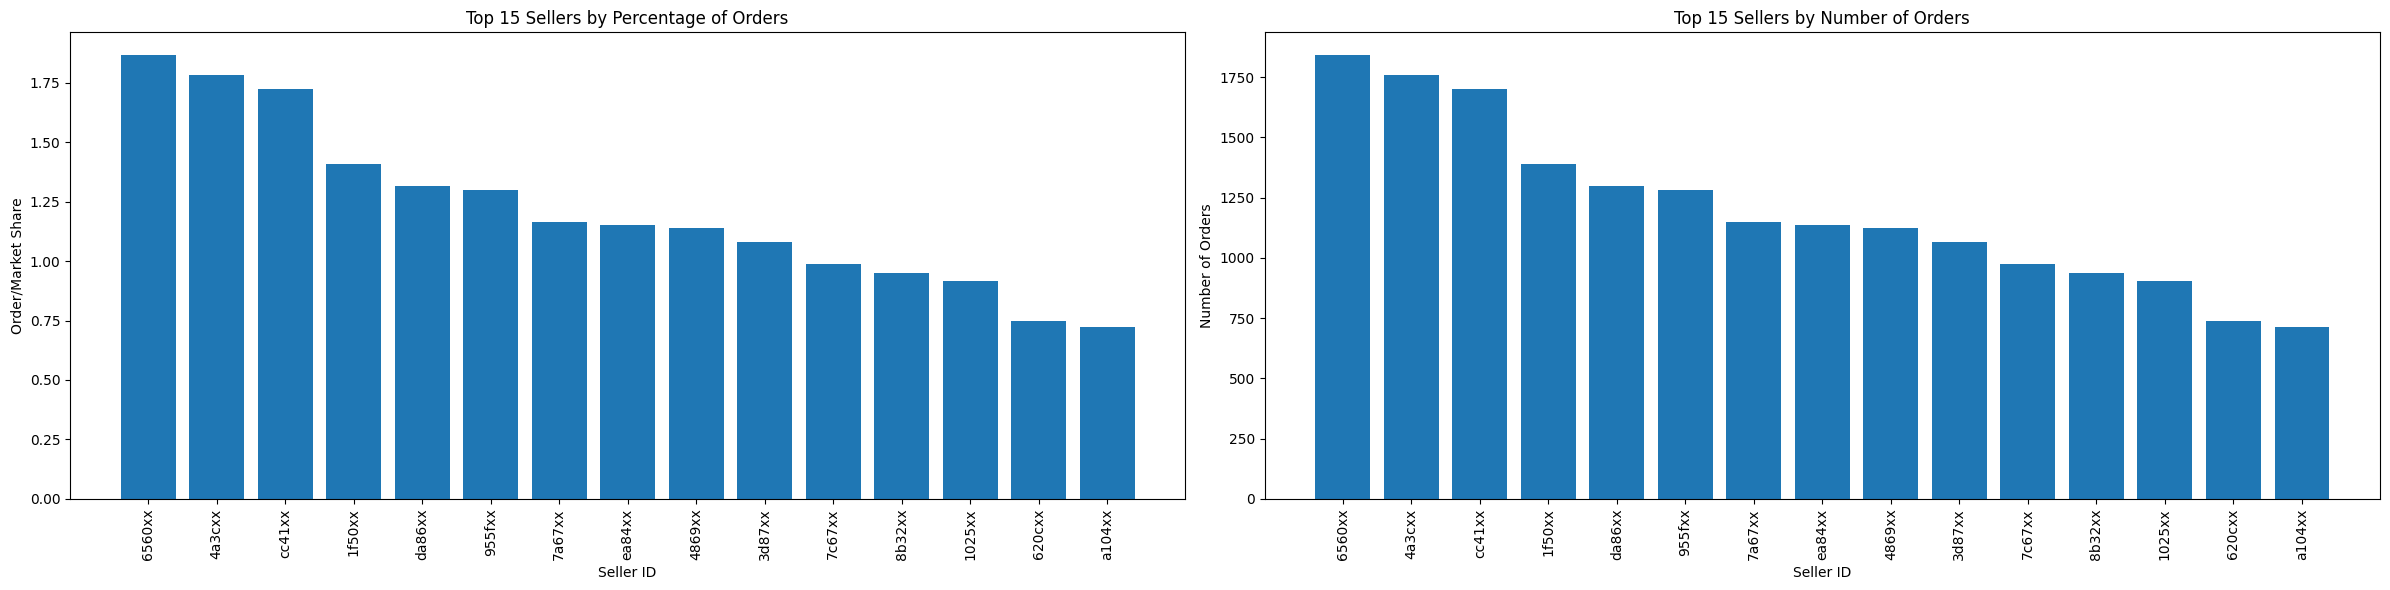

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_orders_dataset.csv']
order_items = dataframes['olist_order_items_dataset.csv']

unique_orders = order_items.drop_duplicates(subset=['order_id'])
seller_order_counts = unique_orders['seller_id'].value_counts()
c = seller_order_counts.head(15)

total_orders = seller_order_counts.sum()
top_15_percentages = (c / total_orders) * 100

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(24, 6))  # 1 row, 2 columns

# Plot 1: Top 15 Sellers by Percentage of Orders
axes[0].bar(top_15_percentages.index.str[:4] + ['xx'], top_15_percentages.values)
axes[0].set_xlabel('Seller ID')
axes[0].set_ylabel('Order/Market Share')
axes[0].set_title('Top 15 Sellers by Percentage of Orders')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot 2: Top 15 Sellers by Number of Orders
axes[1].bar(c.index.str[:4] + ['xx'], c.values)
axes[1].set_xlabel('Seller ID')
axes[1].set_ylabel('Number of Orders')
axes[1].set_title('Top 15 Sellers by Number of Orders')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



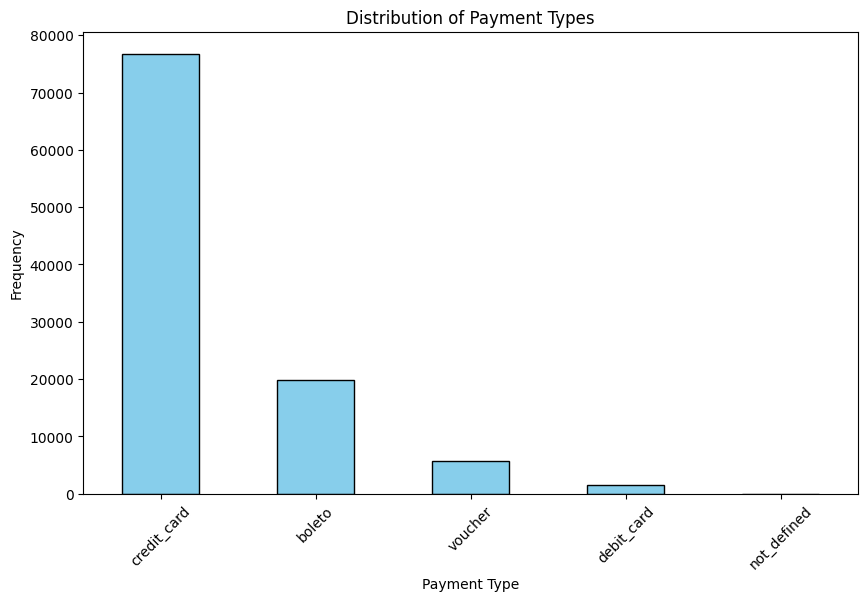

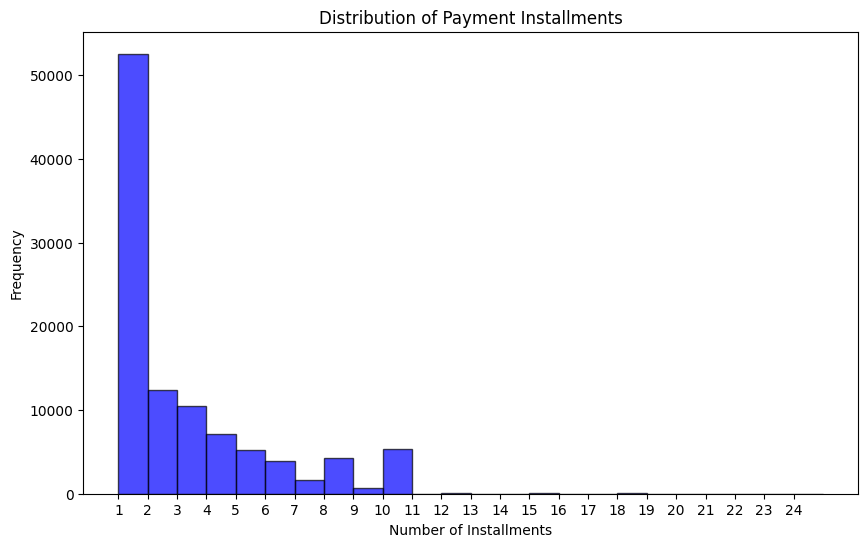

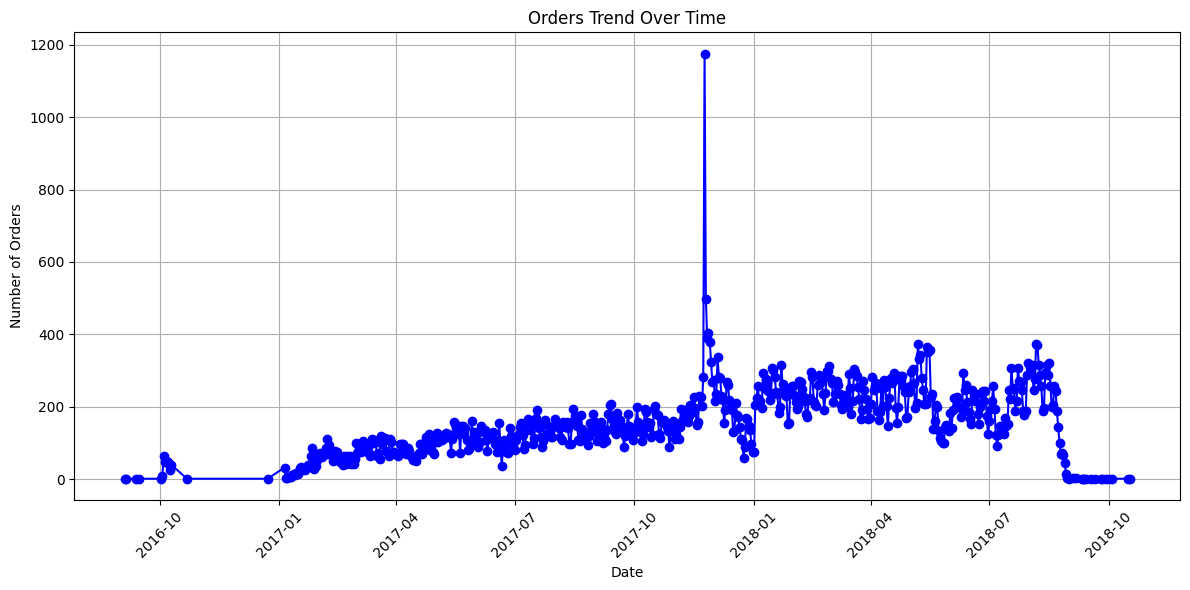

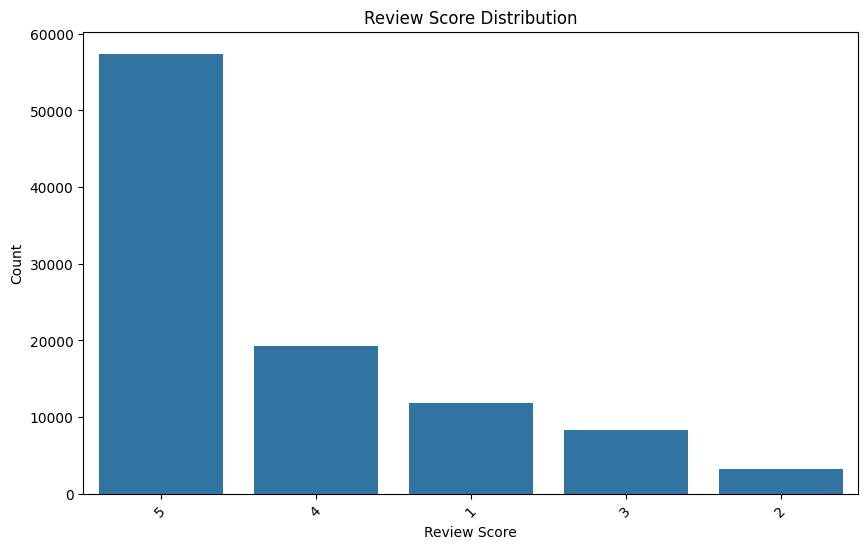

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        if filename == 'olist_orders_dataset.csv':
            dataframes[filename]['order_purchase_timestamp'] = pd.to_datetime(dataframes[filename]['order_purchase_timestamp'])

            # Group by date and count the number of orders
            orders_trend = dataframes[filename].groupby(dataframes[filename]['order_purchase_timestamp'].dt.date).size()

            # Create a line chart
            plt.figure(figsize=(12, 6))
            plt.plot(orders_trend.index, orders_trend.values, marker='o', linestyle='-', color='blue')
            plt.title('Orders Trend Over Time')
            plt.xlabel('Date')
            plt.ylabel('Number of Orders')
            plt.xticks(rotation=45)
            plt.grid()
            plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
            plt.show()

        elif filename == 'olist_order_reviews_dataset.csv':
            plt.figure(figsize=(10, 6))
            sns.countplot(data=dataframes[filename], x='review_score', order=dataframes[filename]['review_score'].value_counts().index)
            plt.title('Review Score Distribution')
            plt.xlabel('Review Score')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

        elif filename == 'olist_order_payments_dataset.csv':

            # distribution of payment types
            payment_type_counts = dataframes[filename]['payment_type'].value_counts()
            plt.figure(figsize=(10, 6))
            payment_type_counts.plot.bar(color='skyblue', edgecolor='black')
            plt.title('Distribution of Payment Types')
            plt.xlabel('Payment Type')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()


           # distribution of payment installments
            plt.figure(figsize=(10, 6))
            plt.hist(dataframes[filename]['payment_installments'], bins=range(1, dataframes[filename]['payment_installments'].max() + 2), alpha=0.7, color='blue', edgecolor='black')
            plt.title('Distribution of Payment Installments')
            plt.xlabel('Number of Installments')
            plt.ylabel('Frequency')
            plt.xticks(range(1, dataframes[filename]['payment_installments'].max() + 1))
            plt.show()


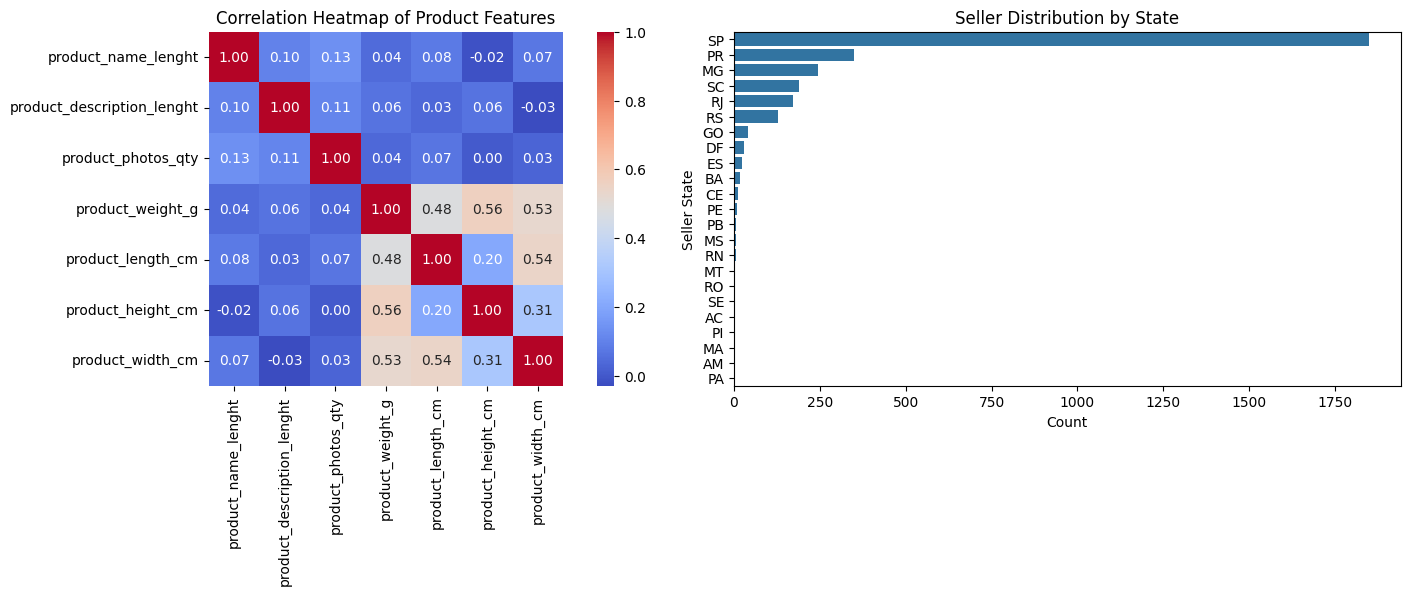

In [ ]:

dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)
        df = pd.read_csv(file_path, encoding='latin-1')
        dataframes[filename] = df

        if filename == 'olist_products_dataset.csv':
          numerical_df = dataframes[filename].select_dtypes(include=['number'])
          correlation_matrix = numerical_df.corr()

        elif filename == 'olist_sellers_dataset.csv':
          pass  # Placeholder for the second chart data

# Create a figure and two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Plot the correlation heatmap on the first subplot (axes[0])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, ax=axes[0])
axes[0].set_title('Correlation Heatmap of Product Features')

# Plot the seller distribution on the second subplot (axes[1])
sns.countplot(data=dataframes['olist_sellers_dataset.csv'], y='seller_state',
              order=dataframes['olist_sellers_dataset.csv']['seller_state'].value_counts().index,
              ax=axes[1])
axes[1].set_title('Seller Distribution by State')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Seller State')

# Adjust layout and display the plots
plt.tight_layout()  # To prevent overlapping of subplots
plt.show()

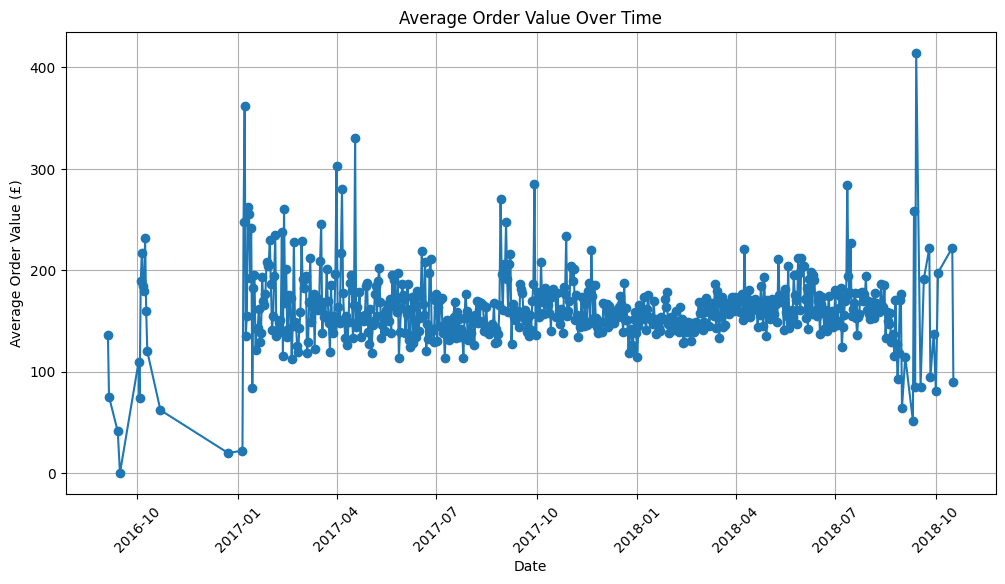

In [ ]:


datasets_path = '/content/drive/MyDrive/olist_data' # Define the path to your datasets

# Load datasets using the correct path
orders_df = pd.read_csv(os.path.join(datasets_path, 'olist_orders_dataset.csv')) # Use os.path.join to create the full file path
payments_df = pd.read_csv(os.path.join(datasets_path, 'olist_order_payments_dataset.csv')) # Use os.path.join to create the full file path

# Convert timestamps to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Aggregate total payment per order (some orders may have multiple payments)
order_payments = payments_df.groupby('order_id', as_index=False)['payment_value'].sum()

# Merge orders with aggregated payment data
orders_payments_df = orders_df.merge(order_payments, on="order_id", how="left")

# Aggregate total revenue and order count per day
revenue_orders_over_time = orders_payments_df.groupby(orders_payments_df['order_purchase_timestamp'].dt.date).agg(
    total_revenue=('payment_value', 'sum'),  # Total revenue per day
    total_orders=('order_id', 'count')       # Total orders per day
)

# Calculate Average Order Value (AOV) per day
revenue_orders_over_time['average_order_value'] = revenue_orders_over_time['total_revenue'] / revenue_orders_over_time['total_orders']

# Remove outliers (Optional: If some days have extreme values)
revenue_orders_over_time = revenue_orders_over_time[revenue_orders_over_time['average_order_value'] < 500]

# Plot AOV over time
plt.figure(figsize=(12, 6))
plt.plot(revenue_orders_over_time.index, revenue_orders_over_time['average_order_value'], marker='o', linestyle='-')

# Formatting the chart
plt.xlabel('Date')
plt.ylabel('Average Order Value (£)')
plt.title('Average Order Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.show()

**1.2  Summary of the data and Missing Values**

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data'


def remove_outliers_iqr(df, numerical_cols):
          for col in numerical_cols:
              Q1 = df[col].quantile(0.25)
              Q3 = df[col].quantile(0.75)
              IQR = Q3 - Q1
              lower_bound = Q1 - 1.5 * IQR
              upper_bound = Q3 + 1.5 * IQR

              # Remove outliers
              initial_shape = df.shape
              df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
              if df.shape != initial_shape:
                  print(f'Removed outliers from {col} using IQR method in {filename}.')

          return df

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame, specifying the encoding
        # Try 'latin-1' or 'ISO-8859-1' if 'utf-8' doesn't work
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Check for missing values
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f'{filename} has {missing_values} missing values.')
        else:
            print(f'{filename} has no missing values.')

        # Summarize the data
        print(f'\nSummary of {filename}:')
        print(df.describe(include='all'))

        # Check for timestamp data type and convert if necessary
        for col in df.columns:
            if 'date' in col.lower() or 'time' in col.lower():
                try:
                    df[col] = pd.to_datetime(df[col])
                    print(f'Converted {col} to datetime in {filename}.')
                except Exception as e:
                    print(f'Failed to convert {col} in {filename}. Error: {e}')

        # Check for categorical data
        categorical_cols = df.select_dtypes(include='object').columns.tolist()
        if categorical_cols:
            print(f'Categorical columns in {filename}: {categorical_cols}')

        # Plotting distribution of numerical features
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


        # Check if feature scaling is needed
        if numerical_cols:
            for col in numerical_cols:
                min_val = df[col].min()
                max_val = df[col].max()
                print(f'{col} in {filename} has min: {min_val}, max: {max_val}')

        # Additional pre-processing steps
        # Dropping duplicates
        initial_shape = df.shape
        df.drop_duplicates(inplace=True)
        if df.shape != initial_shape:
            print(f'Dropped duplicates in {filename}.')

        # Checking for noise (e.g., negative values where not expected)
        for col in numerical_cols:
            if (df[col] < 0).any():
                print(f'Noise detected: Negative values in {col} of {filename}.')


        for filename, df in dataframes.items():
            numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
            df = remove_outliers_iqr(df, numerical_cols)
            dataframes[filename] = df


olist_customers_dataset.csv has no missing values.

Summary of olist_customers_dataset.csv:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN          

<ipython-input-6-a9c92724e0f8>:48: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])
<ipython-input-6-a9c92724e0f8>:48: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col])


Converted review_answer_timestamp to datetime in olist_order_reviews_dataset.csv.
Categorical columns in olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_comment_title', 'review_comment_message']
review_score in olist_order_reviews_dataset.csv has min: 1, max: 5
Removed outliers from geolocation_lat using IQR method in olist_geolocation_dataset.csv.
Removed outliers from price using IQR method in olist_order_items_dataset.csv.
Removed outliers from product_description_lenght using IQR method in olist_products_dataset.csv.
Removed outliers from product_weight_g using IQR method in olist_products_dataset.csv.
Removed outliers from product_length_cm using IQR method in olist_products_dataset.csv.
Removed outliers from product_height_cm using IQR method in olist_products_dataset.csv.
Removed outliers from review_score using IQR method in olist_order_reviews_dataset.csv.


**1.3 Timestamp Data**

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'
dataframes = {}
for filename in os.listdir(datasets_path):
  if filename.endswith('.csv'):
    file_path = os.path.join(datasets_path, filename)
    df = pd.read_csv(file_path, encoding='latin-1')
    dataframes[filename] = df


for filename, df in dataframes.items():
       for column in df.columns:
           if 'timestamp' in column.lower():
               # Apply HTML styling for blue text
               display(HTML(f"<span style='color:blue;'>{filename}: {column}</span>"))

# Task 2 Customer Segmentation

**Segment 1 - Least Satisified Customers**

To derive this segment, we derived the percentage of frequency that each score 1 - 5 has in the 'review' column. After score 5, the amount of scores with 1s or 2s make up the 2nd and 3rd most amounts of scores with 19% and 11%  highlighting a significant amount of dissatisfied customers.

Based on these customers, we should proactively address their satisfaction levels by implementing retention strategies, such as offering small discounts or exclusive perks. This will help enhance their loyalty and reduce the likelihood of them switching to a competitor.

Among the dissatisfied, we have identified the recurring customers who still frequently buy the products represented in the variable 'low_r_customer_ids', they should be given more discounts than the others because they make up the segment of loyal customers too and if it’s not in the budget only them should be offered the discounts.

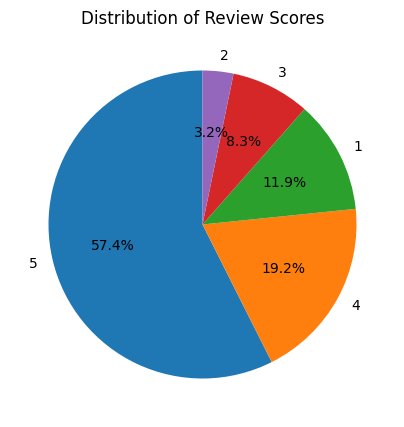

['eecafc3ff695f031bfe354a9fff9d437', 'db13a417a95ad304e9674468c17ade85', 'e545e697bb9d1b81e0a702121d4e94d5', '5bb8de60ca2ca8b01a5ce471802fe10b', '30e6e854c81fa16f46a5d7f3ab025e6f', 'c17d38e818f10c91ebcd036bc835a648', '2438ba50f3a77cbfd3377900835fb526', '29a48e3e901b5187dae9af8a5563c795', '8c99550966de67486c939c2337338326', '5458c93e0db88f9b885bc7dbc3bfa2a3', '9a4a662f2adad6ed0a31fd0d4221e1cc', '5fe0562353e8f0b6c0c6b55cd0f58fe0', 'a08a7edd638cbf99e97e2ed2d19483be', 'd3286ca43aa21423c6045b2806ca8e56', '35a436968e81c497c7f713bac80c42d0', '2e7caf02d3f51fe071a2444d36ea2d51', 'a44a4a6e7b2c7cc8ae47bcc8bdb3cdd5', '8cc5b669b36635162d2d3261b8559d6a', '3068255d75f415c21b115399dc51f7ea', '9fa9fdb373ab71b7d9081e43795accd2', 'df0f79495c6708eb945df0f91d5eada1', 'de3488839c20b6109821b6a1af9818df', 'ced5464be4716dddff6e88ccf5e0261a', '49fbaec7f8c365d12595c7b6cb6db285', '0e453162f1e34646ff631c2379109bea', '54ef4ab32481f5109378c975bbe5faa9', '3b9375de9837ce03b6516b3a343ad6be', '6225eed02b7d1a110b6e5b5dd4

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

dataframes = {}

# Loop through the files in the datasets_path
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the DataFrame in the dictionary using the filename as the key
        dataframes[filename] = df

df1 = dataframes['olist_order_reviews_dataset.csv']
df2 = dataframes['olist_orders_dataset.csv']
df3 = df1['review_score']
df4 = df2['order_id']

# Calculate the counts of each review score
score_counts = df1['review_score'].value_counts()

# Calculate the percentages of each score
score_percentages = (score_counts / score_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(score_percentages, labels=score_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Review Scores')
plt.show()

# Filter df1 for review scores 1 and 2 to create filtered_df1
filtered_df1 = df1[df1['review_score'].isin([1, 2])]

# Extract the order_id from the filtered DataFrame
low_rating_order_ids = filtered_df1['order_id'].tolist()

# Merge filtered_df1 with df2 to get customer_id
low_r_customer = pd.merge(filtered_df1[['order_id']], df2[['order_id', 'customer_id']], on='order_id', how='left')

# Get the unique customer IDs
low_r_customer_ids = low_r_customer['customer_id'].unique().tolist()

# Print or use low_r_customer_ids
print(low_r_customer_ids)
number_of_1s_or2s=len(low_r_customer_ids)
print(number_of_1s_or2s)
print(score_counts)

**Segment 2 - Best Customers (By value of orders)**

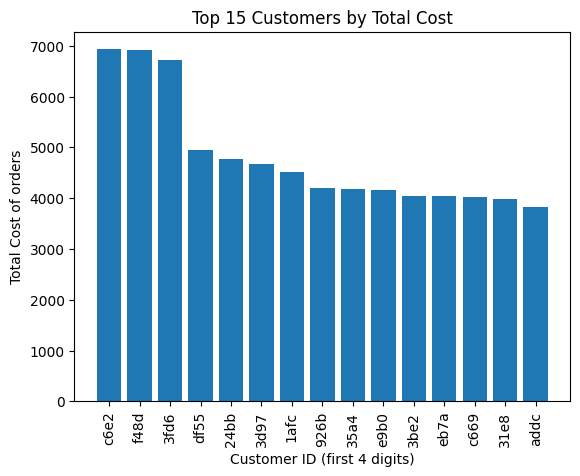

In [ ]:
order_items = dataframes['olist_order_items_dataset.csv']
orders = dataframes['olist_orders_dataset.csv']  # Needed for linking 'order_id' to 'customer_id'
customers = dataframes['olist_customers_dataset.csv']

# Ensure 'price' and 'freight_value' are numeric
order_items['price'] = order_items['price'].astype(float)
order_items['freight_value'] = order_items['freight_value'].astype(float)

# Calculate total cost
order_items['total_cost'] = order_items['price'] + order_items['freight_value']

# Sort by 'total_cost' in descending order
n_sorted = order_items.sort_values(by=['total_cost'], ascending=False)

# Merge 'order_items' with 'orders' to get 'customer_id'
merged_orders = pd.merge(n_sorted, orders[['order_id', 'customer_id']], on="order_id", how="left")

# Merge with 'customers' dataset to add 'customer_id' details
final_data = pd.merge(merged_orders, customers, on="customer_id", how="left")


plt.bar(final_data['customer_id'].head(15), final_data['total_cost'].head(15))
plt.xlabel('Customer ID (first 4 digits)')
plt.ylabel('Total Cost of orders')
plt.title('Top 15 Customers by Total Cost')
plt.xticks(plt.xticks()[0], [str(tick)[:4] for tick in final_data['customer_id'].head(15)], rotation=90)

plt.show()

**Customer Segementation by Location**

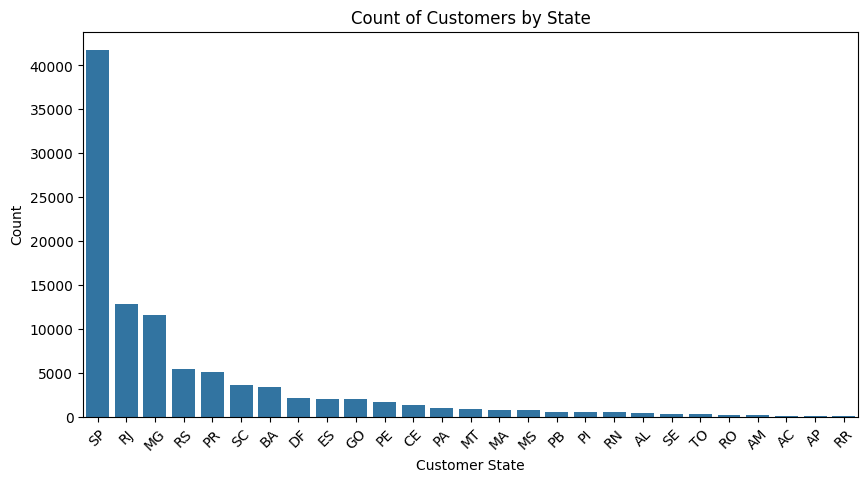

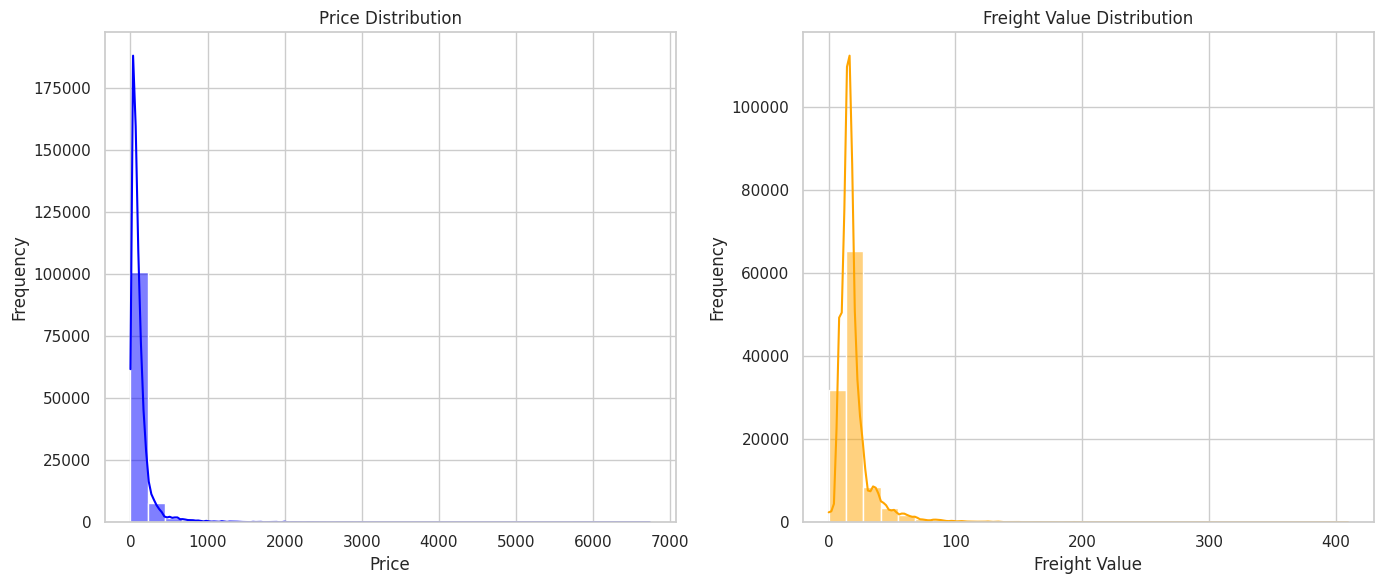

In [ ]:
datasets_path = '/content/drive/MyDrive/olist_data'

# Create an empty dictionary to store the dataframes
dataframes = {}
for filename in os.listdir(datasets_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(datasets_path, filename)

        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding='latin-1')

        # Store the dataframe in the dictionary
        dataframes[filename] = df

        # Plotting based on the dataset - INDENTED INSIDE THE LOOP
        if filename == 'olist_customers_dataset.csv':
            # Bar chart for customer count by state
            plt.figure(figsize=(10, 5))
            sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index)
            plt.title('Count of Customers by State')
            plt.xlabel('Customer State')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif filename == 'olist_geolocation_dataset.csv':
            state_counts = dataframes[filename]['geolocation_state'].value_counts().reset_index()
            state_counts.columns = ['state', 'count']

            # URL to a GeoJSON file for Brazilian states
            brazil_geojson_url = (
                "https://raw.githubusercontent.com/codeforamerica/click_that_hood/"
                "master/public/data/brazil-states.geojson"
            )

            # Create the Choropleth Map
            fig = px.choropleth(
                state_counts,
                geojson=brazil_geojson_url,
                locations='state',  # State abbreviations (e.g., "SP")
                featureidkey='properties.sigla',  # Key in GeoJSON matching state abbreviations
                color='count',  # Values to color
                color_continuous_scale='Blues',
                scope='south america',  # Focus on Brazil
                labels={'count': 'Number of Zip Codes'},
                title='Geolocation Density by Brazilian State'
            )

            # Adjust map layout
            fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
            fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
            fig.show()

        elif filename == 'olist_order_items_dataset.csv':
            # Box plot for price distribution
            # plt.figure(figsize=(10, 5))
            # sns.boxplot(x=df['price'])
            # plt.title('Box Plot of Prices')
            # plt.xlabel('Price')
            # plt.grid()
            # plt.show()

            sns.set(style="whitegrid")
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))
            # Histogram for Price
            sns.histplot(dataframes[filename]['price'], bins=30, kde=True, ax=axes[0], color='blue')
            axes[0].set_title('Price Distribution')
            axes[0].set_xlabel('Price')
            axes[0].set_ylabel('Frequency')
            # Histogram for Freight Value
            sns.histplot(dataframes[filename]['freight_value'], bins=30, kde=True, ax=axes[1], color='orange')
            axes[1].set_title('Freight Value Distribution')
            axes[1].set_xlabel('Freight Value')
            axes[1].set_ylabel('Frequency')

            plt.tight_layout()
            plt.show()

Repeat Customers: 2997
One-Time Customers: 93099


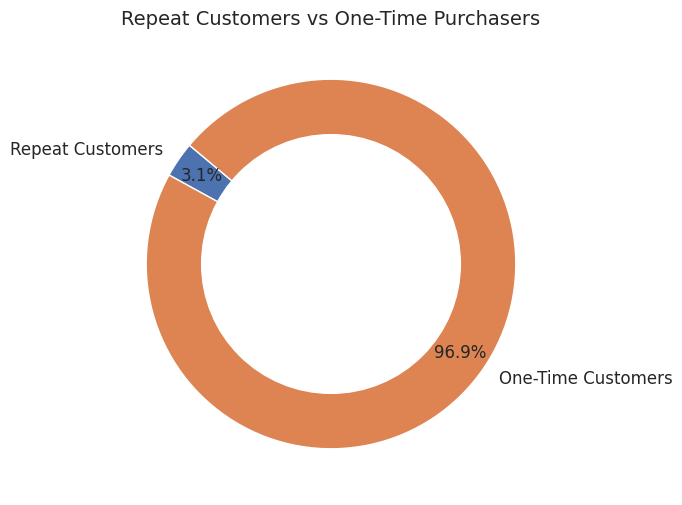

In [ ]:

datasets_path = '/content/drive/MyDrive/olist_data' # Define your datasets path

# Load datasets using the correct path
customers_df = pd.read_csv(os.path.join(datasets_path, 'olist_customers_dataset.csv')) # Use os.path.join to create the full file path
orders_df = pd.read_csv(os.path.join(datasets_path, 'olist_orders_dataset.csv')) # Use os.path.join to create the full file path


# Merge datasets to link customers with orders
customer_orders_df = orders_df.merge(customers_df, on="customer_id", how="left")

# Count the number of purchases per customer
customer_order_counts = customer_orders_df['customer_unique_id'].value_counts()

# Categorize customers
repeat_customers_count = (customer_order_counts > 1).sum()
one_time_customers_count = (customer_order_counts == 1).sum()

# Print results
print(f"Repeat Customers: {repeat_customers_count}")
print(f"One-Time Customers: {one_time_customers_count}")

# Create a donut chart for repeat vs. one-time customers
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [repeat_customers_count, one_time_customers_count]
labels = ['Repeat Customers', 'One-Time Customers']

# Create the pie chart with a donut effect
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.85
)

# Format the text
for text in texts + autotexts:
    text.set_fontsize(12)

# Add a circle in the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Repeat Customers vs One-Time Purchasers', fontsize=14)

# Display the chart
plt.show()



In [ ]:
from datetime import datetime

# Define today's date (assuming dataset is outdated)
today = datetime(2018, 12, 31)  # Adjust if needed

# Calculate days since last order
customer_behavior['days_since_last_order'] = (today - customer_behavior['last_order']).dt.days

# Define segmentation based on recency
customer_behavior['customer_segment'] = 'Inactive Buyer'
customer_behavior.loc[customer_behavior['days_since_last_order'] <= 180, 'customer_segment'] = 'Dormant Buyer'
customer_behavior.loc[customer_behavior['days_since_last_order'] <= 90, 'customer_segment'] = 'Recent Buyer'

# Count customer segments
customer_segment_counts = customer_behavior['customer_segment'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Recency Segmentation')
plt.show()

# Display results
from google.colab import data_table
data_table.DataTable(customer_behavior)



NameError: name 'customer_behavior' is not defined

Average Order Value of Customers - Low AOV < £50, Medium AOV £50 - £150, High AOV > £150

In [ ]:
# Calculate Average Order Value (AOV)
customer_behavior['average_order_value'] = customer_behavior['total_spent'] / customer_behavior['total_orders']

# Define segmentation based on spending
customer_behavior['customer_segment'] = 'Low AOV'
customer_behavior.loc[customer_behavior['average_order_value'] > 50, 'customer_segment'] = 'Medium AOV'
customer_behavior.loc[customer_behavior['average_order_value'] > 150, 'customer_segment'] = 'High AOV'

# Count customer segments
customer_segment_counts = customer_behavior['customer_segment'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Segmentation by Average Order Value')
plt.show()

# Display results
data_table.DataTable(customer_behavior)


NameError: name 'customer_behavior' is not defined

In [ ]:
# Define spending percentiles
high_spender_threshold = customer_behavior['total_spent'].quantile(0.75)
low_spender_threshold = customer_behavior['total_spent'].quantile(0.25)

# Segment customers
customer_behavior['customer_segment'] = 'Mid-Spender'
customer_behavior.loc[customer_behavior['total_spent'] >= high_spender_threshold, 'customer_segment'] = 'Big Spender'
customer_behavior.loc[customer_behavior['total_spent'] <= low_spender_threshold, 'customer_segment'] = 'Budget Buyer'

# Count customer segments
customer_segment_counts = customer_behavior['customer_segment'].value_counts()

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Customer Spending Segmentation')
plt.show()

# Display results
from google.colab import data_table
data_table.DataTable(customer_behavior)


NameError: name 'customer_behavior' is not defined

**Segment 4 - Product Categories**

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

order_items = dataframes['olist_order_items_dataset']
products = dataframes['olist_products_dataset']
category_translation = dataframes['product_category_name_translation']
orders = dataframes['olist_orders_dataset']
customers = dataframes['olist_customers_dataset']

# Merge product data with category translation
products = products.merge(category_translation, left_on='product_category_name', right_on='ï»¿product_category_name', how='left')
products = products.drop(columns=['ï»¿product_category_name'])
# Merge with order items to get order-level data
order_data = order_items.merge(products, on='product_id', how='left')

# Calculate total spending per category
category_spending = order_data.groupby('product_category_name_english')['price'].sum().reset_index()
category_spending = category_spending.sort_values(by='price', ascending=False)

# Average order value per category
category_avg_order = order_data.groupby('product_category_name_english')['price'].mean().reset_index()
category_avg_order = category_avg_order.sort_values(by='price', ascending=False)

# Visualisations
#### Total Spending by Category - Identify which categories generate the most revenue.####
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', hue='product_category_name_english', data=category_spending.head(10), palette='viridis', legend=False)
plt.title('Top 10 Categories by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.show()

#### Average Order Value by Category - See which categories have the highest average spending.####
plt.figure(figsize=(12, 6))
sns.barplot(x='price', y='product_category_name_english', hue='product_category_name_english',data=category_avg_order.head(10), palette='magma', legend=False)
plt.title('Top 10 Categories by Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Product Category')
plt.show()


##### Cross-Category Buying Patterns  - To analyze if certain categories are more popular in specific regions or cities.#####


# Link with order and customer data to get location details
order_data = order_data.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')
order_data = order_data.merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id', how='left')


# Group by category and state to calculate total spending per state
category_state_spending = order_data.groupby(['product_category_name_english', 'customer_state'])['price'].sum().reset_index()

# Get top 10 states with the highest spending
top_states = category_state_spending.groupby('customer_state')['price'].sum().sort_values(ascending=False).head(10).index

# Filter for top states only
top_state_data = category_state_spending[category_state_spending['customer_state'].isin(top_states)]

# Get top 5 product categories in these states
top_categories = top_state_data.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(5).index
top_state_category_data = top_state_data[top_state_data['product_category_name_english'].isin(top_categories)]

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='price', y='product_category_name_english', hue='customer_state', data=top_state_category_data, palette='Spectral')
plt.title('Top 5 Product Categories in Top 10 States')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.legend(title='State')
plt.show()

**Segment 5 - Geographical and Demographic Insights**

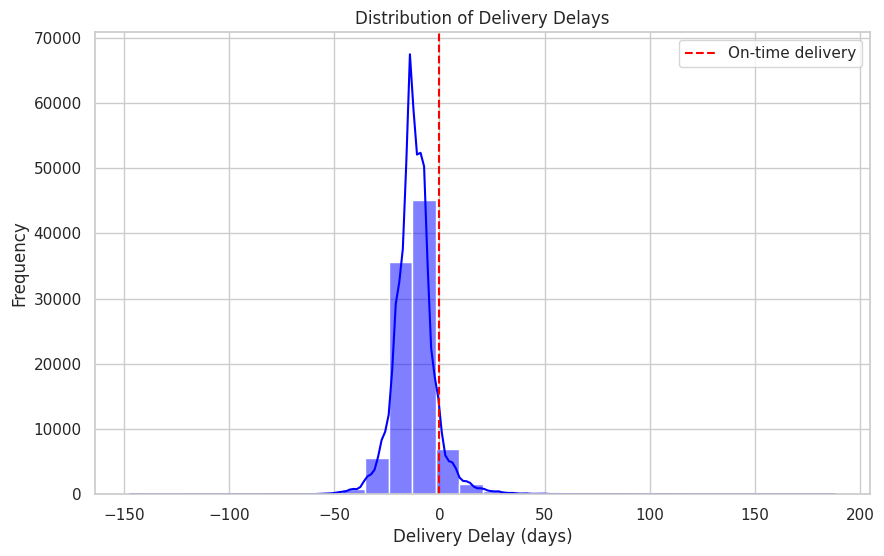

<ipython-input-13-c6bde4784d47>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




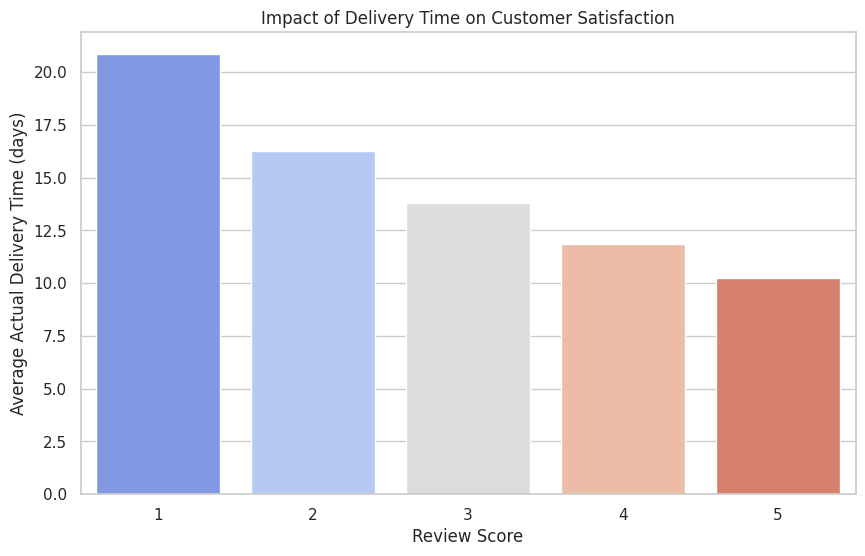

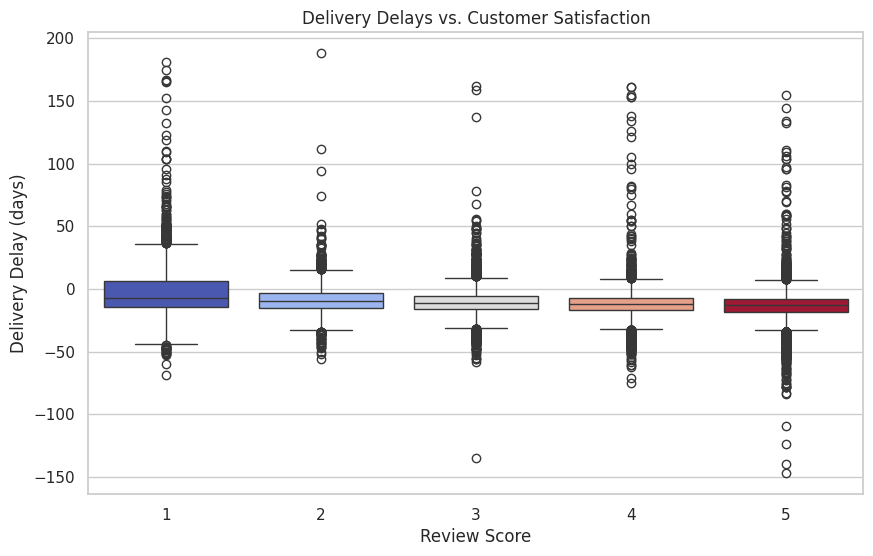

In [ ]:


# Set the folder path
folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

orders_df = dataframes['olist_orders_dataset']
reviews_df = dataframes['olist_order_reviews_dataset']

date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])


orders_df['actual_delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['estimated_delivery_time'] = (orders_df['order_estimated_delivery_date'] - orders_df['order_purchase_timestamp']).dt.days
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

orders_reviews_df = pd.merge(orders_df, reviews_df[['order_id', 'review_score']], on='order_id', how='inner')


review_delivery_analysis = orders_reviews_df.groupby('review_score').agg(
    avg_actual_delivery=('actual_delivery_time', 'mean'),
    avg_estimated_delivery=('estimated_delivery_time', 'mean'),
    avg_delivery_delay=('delivery_delay', 'mean')
).reset_index()


# Plot Delivery Delays Distribution
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['delivery_delay'], bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='dashed', label='On-time delivery')
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delivery Delay (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot Average Delivery Time by Review Score
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='avg_actual_delivery', data=review_delivery_analysis, palette='coolwarm')
plt.title('Impact of Delivery Time on Customer Satisfaction')
plt.xlabel('Review Score')
plt.ylabel('Average Actual Delivery Time (days)')
plt.show()

# Scatter plot for Delivery Delay vs. Review Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_delay', data=orders_reviews_df,
            hue='review_score', palette='coolwarm', legend=False)
plt.title('Delivery Delays vs. Customer Satisfaction')
plt.xlabel('Review Score')
plt.ylabel('Delivery Delay (days)')
plt.show()

# Task 3 Recommender System

The main strategy will be content-based filtering. First, we will retrieve the customer's purchasing history and identify products they have rated 4 stars or higher. Next, we will extract the order IDs associated with these high-rated reviews to determine the specific products purchased. From there, we will identify the product categories and recommend similar categories based on the customer's preferences.



In [ ]:
#3.1 Get the purchase history first
#Enter the customer who you want to see their recommendations for
example_customer=("f48d464a0baaea338cb25f816991ab1f")

folder_path = '/content/drive/MyDrive/olist_data'

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary of DataFrames
dataframes = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    df_name = file.split('.')[0]  # Use filename (without .csv) as the key
    dataframes[df_name] = pd.read_csv(file_path, encoding='latin-1')

df1 = dataframes['olist_order_reviews_dataset']
df2 = dataframes['olist_orders_dataset']
df3 = dataframes['olist_order_items_dataset']
df4 = dataframes['olist_products_dataset']
df5 = dataframes['product_category_name_translation']
df6 = dataframes['olist_customers_dataset']
df7 = dataframes['olist_order_reviews_dataset']

# Merge the necessary dataframes
merged_df = df6.merge(df2, on='customer_id', how='inner')
merged_df = merged_df.merge(df3, on='order_id', how='inner')

# Filter for the example customer
customer_orders = merged_df[merged_df['customer_id'] == example_customer]


order_ids_list = []
if not customer_orders.empty:
  order_ids = customer_orders['order_id'].unique()
  print(f"Order IDs for customer {example_customer}:")
  for order_id in order_ids:
    order_ids_list.append(order_id)
    print(order_ids_list)
else:
  print(f"No orders found for customer {example_customer}")


#3.2 Factor in the Reviews
#Use the review score to either dampen the recommendation of the category of product or promote it

# ... (previous code to create order_ids_list) ...

review_scores = {}  # Dictionary to store order_id and review_score_category

for order_id in order_ids_list:
    # Filter df7 (reviews) for the current order_id
    review_for_order = df7[df7['order_id'] == order_id]

    # Check if a review exists for the order
    if not review_for_order.empty:
        review_score = review_for_order['review_score'].iloc[0]  # Get the review score

        # Store 0 or 1 based on review score
        if review_score < 3:
            review_scores[order_id] = 0  # Store 0 for negative review
        else:
            review_scores[order_id] = 1  # Store 1 for positive review
    else:
        review_scores[order_id] = -1 # Store -1 if no review found

# Print the review_scores dictionary
print(review_scores)
product_ids_for_orders = df3[df3['order_id'].isin(order_ids_list)]['product_id'].unique()

print("Product IDs associated with the orders:", product_ids_for_orders)
product_categories_for_orders = df4[df4['product_id'].isin(product_ids_for_orders)]['product_category_name'].unique()

# Print the product categories
print("Product categories associated with the orders:", product_categories_for_orders)

#3.3 Factor in Product Details
#Things like product dimension or price should be used to decide what to recommend to the user

# Merge product data with order items to include price
df4_with_price = df4.merge(df3[['product_id', 'price']], on='product_id', how='left')

# Recommend new products (same category, not previously bought)
recommended_products = df4_with_price[
    (df4_with_price['product_category_name'].isin(product_categories_for_orders)) |
    (df4_with_price['product_id'].isin(product_ids_for_orders))
]

# Sort recommendations by price similarity or highest reviews (if available)
recommended_products = recommended_products.sort_values(by='price', ascending=True).head(5)


# Ensure we don't sample more than available products
num_recommendations = min(5, len(recommended_products))

if num_recommendations > 0:
    top_recommendations = recommended_products.sample(num_recommendations)
    print("Recommended Products:")
    print(top_recommendations[['product_id', 'product_category_name', 'price']])
else:
    print("No new products found to recommend in the same category.")


Order IDs for customer f48d464a0baaea338cb25f816991ab1f:
['fefacc66af859508bf1a7934eab1e97f']
{'fefacc66af859508bf1a7934eab1e97f': 0}
Product IDs associated with the orders: ['69c590f7ffc7bf8db97190b6cb6ed62e']
Product categories associated with the orders: ['pcs']
Recommended Products:
                              product_id product_category_name  price
54490   e4d6002d3e034177ea1f31aa222cc722                   pcs  560.0
106647  437c27398475365e3103e091ce518c6f                   pcs  580.0
103128  2fde77c0db49f38e0c0b2065f984f452                   pcs  530.0
54491   e4d6002d3e034177ea1f31aa222cc722                   pcs  560.0
108818  65f37bbbadf973d2660dc911af121406                   pcs   34.5


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Identify all future orders placed by the customer
if 'customer_id' in df2.columns and 'order_id' in df2.columns:
    customer_future_orders = df2[df2['customer_id'] == example_customer]['order_id'].unique()
else:
    print("Error: 'customer_id' or 'order_id' not found in orders dataset.")
    customer_future_orders = []

# Step 2: Find products in those future orders
if len(customer_future_orders) > 0 and 'order_id' in df3.columns and 'product_id' in df3.columns:
    future_orders = df3[df3['order_id'].isin(customer_future_orders)]['product_id'].unique()
else:
    print("⚠️ Warning: No future purchases found for this customer. Evaluation may be inaccurate.")
    future_orders = []

# Step 3: Verify recommended products have 'product_id'
if 'product_id' not in recommended_products.columns:
    print("Error: 'product_id' not found in recommended_products.")
else:
    # Step 4: Assign ground truth labels
    recommended_products = recommended_products.copy()  # Prevent SettingWithCopyWarning
    recommended_products['actual'] = recommended_products['product_id'].apply(lambda x: 1 if x in future_orders else 0)

    # Step 5: Extract true labels (ground truth) and predicted labels (recommendations)
    y_true = recommended_products['actual'].values  # Actual purchases (Ground Truth)
    y_pred = [1] * len(y_true)  # All recommended products are positive predictions

    # Step 6: Compute Metrics (only if we have valid data)
    if sum(y_true) > 0:  # Ensure we have at least one true positive case
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)

        # Step 7: Display Results
        print(f"\n📊 **Evaluation Metrics for Recommender System** 📊")
        print(f"✅ Precision: {precision:.2f}")
        print(f"✅ Recall: {recall:.2f}")
        print(f"✅ F1 Score: {f1:.2f}")
        print(f"✅ AUC Score: {auc:.2f}")
    else:
        print("\n⚠️ Not enough positive samples for evaluation. Precision, Recall, and AUC may not be meaningful.")



⚠️ Not enough positive samples for evaluation. Precision, Recall, and AUC may not be meaningful.


In [ ]:
# Step 1: Get all future purchases for each customer
future_orders_df = df2.merge(df3, on='order_id', how='left')[['customer_id', 'product_id']]

# Step 2: Convert to a dictionary {customer_id: [list of product_ids]}
customer_future_orders = future_orders_df.groupby('customer_id')['product_id'].apply(list).to_dict()

# Step 3: Evaluate for all customers at once
total_y_true = []
total_y_pred = []

for customer, future_products in customer_future_orders.items():
    recommended_products['actual'] = recommended_products['product_id'].apply(lambda x: 1 if x in future_products else 0)
    y_true = recommended_products['actual'].values
    y_pred = [1] * len(y_true)  # All recommended products are positive predictions

    total_y_true.extend(y_true)
    total_y_pred.extend(y_pred)

# Compute evaluation metrics
if sum(total_y_true) > 0:
    precision = precision_score(total_y_true, total_y_pred)
    recall = recall_score(total_y_true, total_y_pred)
    f1 = f1_score(total_y_true, total_y_pred)
    auc = roc_auc_score(total_y_true, total_y_pred)

    print("\n📊 **Overall Recommender System Evaluation** 📊")
    print(f"✅ Precision: {precision:.2f}")
    print(f"✅ Recall: {recall:.2f}")
    print(f"✅ F1 Score: {f1:.2f}")
    print(f"✅ AUC Score: {auc:.2f}")
else:
    print("\n⚠️ Not enough positive samples across all customers for evaluation.")



📊 **Overall Recommender System Evaluation** 📊
✅ Precision: 0.00
✅ Recall: 1.00
✅ F1 Score: 0.00
✅ AUC Score: 0.50
